In [1]:
import copy
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import hashlib
from io import BytesIO
import tkinter as tk
from tkinter import filedialog




In [2]:
SubByte = [
    ['63', '7C', '77', '7B', 'F2', '6B', '6F', 'C5', '30', '01', '67', '2B', 'FE', 'D7', 'AB', '76'],
    ['CA', '82', 'C9', '7D', 'FA', '59', '47', 'F0', 'AD', 'D4', 'A2', 'AF', '9C', 'A4', '72', 'C0'],
    ['B7', 'FD', '93', '26', '36', '3F', 'F7', 'CC', '34', 'A5', 'E5', 'F1', '71', 'D8', '31', '15'],
    ['04', 'C7', '23', 'C3', '18', '96', '05', '9A', '07', '12', '80', 'E2', 'EB', '27', 'B2', '75'],
    ['09', '83', '2C', '1A', '1B', '6E', '5A', 'A0', '52', '3B', 'D6', 'B3', '29', 'E3', '2F', '84'],
    ['53', 'D1', '00', 'ED', '20', 'FC', 'B1', '5B', '6A', 'CB', 'BE', '39', '4A', '4C', '58', 'CF'],
    ['D0', 'EF', 'AA', 'FB', '43', '4D', '33', '85', '45', 'F9', '02', '7F', '50', '3C', '9F', 'A8'],
    ['51', 'A3', '40', '8F', '92', '9D', '38', 'F5', 'BC', 'B6', 'DA', '21', '10', 'FF', 'F3', 'D2'],
    ['CD', '0C', '13', 'EC', '5F', '97', '44', '17', 'C4', 'A7', '7E', '3D', '64', '5D', '19', '73'],
    ['60', '81', '4F', 'DC', '22', '2A', '90', '88', '46', 'EE', 'B8', '14', 'DE', '5E', '0B', 'DB'],
    ['E0', '32', '3A', '0A', '49', '06', '24', '5C', 'C2', 'D3', 'AC', '62', '91', '95', 'E4', '79'],
    ['E7', 'C8', '37', '6D', '8D', 'D5', '4E', 'A9', '6C', '56', 'F4', 'EA', '65', '7A', 'AE', '08'],
    ['BA', '78', '25', '2E', '1C', 'A6', 'B4', 'C6', 'E8', 'DD', '74', '1F', '4B', 'BD', '8B', '8A'],
    ['70', '3E', 'B5', '66', '48', '03', 'F6', '0E', '61', '35', '57', 'B9', '86', 'C1', '1D', '9E'],
    ['E1', 'F8', '98', '11', '69', 'D9', '8E', '94', '9B', '1E', '87', 'E9', 'CE', '55', '28', 'DF'],
    ['8C', 'A1', '89', '0D', 'BF', 'E6', '42', '68', '41', '99', '2D', '0F', 'B0', '54', 'BB', '16']
]
Inverse_SubByte = [
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
]

MixColumn = [[2, 3, 1, 1], [1, 2, 3, 1], [1, 1, 2, 3], [3, 1, 1, 2]]
InverseMixColumn = [[14, 11, 13, 9], [9, 14, 11, 13], [13, 9, 14, 11], [11, 13, 9, 14]]

d = dict( (j, (str(hex(x).split('x')[-1])+str(hex(y).split('x')[-1])).upper()) for x, i in enumerate(SubByte) for y, j in enumerate(i) )
#print(d)

for i in range(16):
    for j in range(16):
        m, n = SubByte[i][j][0], SubByte[i][j][1]
        x = int(m,16)
        y = int(n,16)
        Inverse_SubByte[x][y] = d[SubByte[i][j]]

In [3]:
def hexadecimal1(x):
    x1 = ord(x)
    
    z = str(hex(x1)).split('x')
    if(len(z[1]) != 2):
        z[1] = '0'+z[1]
    return z[1].upper()

In [4]:
def XOR(x, y):
    z = []
    for i in range(4):
        temp = str(hex(int(x[i],16)^int(y[i],16)).split('x')[-1]).upper()
        if(len(temp) != 2):
            temp = '0'+temp
        
        z.append(temp)
    return z

In [5]:
def EntendKey(KEY):
    l1 = list(KEY)
    l2 = [hexadecimal1(i) for i in l1]
    #print(l2)
    roundKey = []
    roundKey.append(l2)
    #print(roundKey)
    RC = ['01', '02', '04', '08', '10', '20', '40', '80', '1B', '36']
    rc = [int(i,16) for i in RC]
    for i in range(10):
        w3 = [roundKey[-1][13], roundKey[-1][14], roundKey[-1][15], roundKey[-1][12]]
        subtituteByte = []

        for j in range(4):
            s1 = int(w3[j][0],16)
            s2 = int(w3[j][1],16)
            subtituteByte.append(SubByte[s1][s2])


        subtituteByte[0] = str(hex(int(subtituteByte[0],16)^int(rc[i]))).split('x')[-1].upper()

        if len(subtituteByte[0]) != 2:
            subtituteByte[0] = '0'+subtituteByte[0]

        #print(subtituteByte)
        w4 = XOR(roundKey[-1][0:4],subtituteByte)
        w5 = XOR(roundKey[-1][4:8], w4)
        w6 = XOR(roundKey[-1][8:12], w5)
        w7 = XOR(roundKey[-1][12:16], w6)
        w_final = w4 + w5 + w6 + w7
        roundKey.append(w_final)
    return roundKey

In [6]:
def XOR1(x, y):
    z = [['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]
    for i in range(4):
        for j in range(4):
            temp = str(hex(int(x[i][j],16)^int(y[i][j],16)).split('x')[-1]).upper()
            if(len(temp) != 2):
                temp = '0'+temp

            z[i][j] = temp
    return z

In [7]:
def left_shift(x):
    m = str(hex(int(x, 16)<<1)).split('x')[-1].upper()
    r = ''
    if(len(m)==3):
        m = str(hex(int(m,16)^283)).split('x')[-1].upper()
    if(len(m) != 2):
        m = '0'+m
    r = m[-2]+m[-1]
    return r

def hexadecimalXOR(x, y):
    z = str(hex(int(x, 16)^int(y, 16))).split('x')[-1].upper()
    if(len(z) != 2):
        z = '0'+z
    return z

def left_shift_AND_XOR(x):
    m = left_shift(x)
    n = hexadecimalXOR(m ,x)
    return n

def multiplication(x,y):
    
    z = [['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]
    for i in range(4):
        for j in range(4):
            m = '00'
            for k in range(4):
                if(x[i][k] == 2):
                    a = left_shift(y[k][j])
                    m = hexadecimalXOR(m,a)
                elif(x[i][k] == 1):
                    m = hexadecimalXOR(m, y[k][j])
                elif(x[i][k] == 3):
                    m = hexadecimalXOR(m, left_shift_AND_XOR(y[k][j]))
                elif(x[i][k] == 9):
                    a = left_shift(left_shift(left_shift(y[k][j])))
                    b = hexadecimalXOR(a,y[k][j])
                    m = hexadecimalXOR(m, b)
                    #print(m,a,b)
                elif(x[i][k] == 11):
                    a = left_shift(left_shift(left_shift(y[k][j])))
                    b = left_shift(y[k][j])
                    c = hexadecimalXOR(a, b)
                    d = hexadecimalXOR(c, y[k][j])
                    m = hexadecimalXOR(m, d)
                    #print(m,a,b,c,d)
                elif(x[i][k] ==13):
                    a = left_shift(left_shift(left_shift(y[k][j])))
                    b = left_shift(left_shift(y[k][j]))
                    c = hexadecimalXOR(a, b)
                    d = hexadecimalXOR(c, y[k][j])
                    m = hexadecimalXOR(m, d)
                    #print(m,a,b,c,d)
                elif(x[i][k] == 14):
                    a = left_shift(left_shift(left_shift(y[k][j])))
                    b = left_shift(left_shift(y[k][j]))
                    c = left_shift(y[k][j])
                    d = hexadecimalXOR(a, b)
                    e = hexadecimalXOR(c, d)
                    m = hexadecimalXOR(m, e)
                    #print(m,a,b,c,d,e)
            z[i][j] = m
    return z

In [9]:
def encrypt(msg, roundKey):
    msg_list = list(msg)
    msg_list1 = [hexadecimal1(i) for i in msg_list]
    state_matrix = [['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]
    temp_key = [['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]

    k = 0
    for i in range(4):
        for j in range(4):
            state_matrix[j][i] = msg_list1[k]
            # print(k)
            k = k+1

    k = 0
    for i in range(4):
        for j in range(4):
            temp_key[j][i] = roundKey[0][k]
            k = k+1

    state_matrix = XOR1(state_matrix, temp_key)
    
    for i in range(10):

        # SubstitutionBytes
        for j in range(4):
            for k in range(4):
                m = int(state_matrix[j][k][0], 16)
                n = int(state_matrix[j][k][1], 16)
                state_matrix[j][k] =  SubByte[m][n]

        #print(state_matrix)

        # Shift Row
        temp = copy.deepcopy(state_matrix)

        for j in range(4):
            for k in range(4):
                state_matrix[j][k] = temp[j][(k+j)%4]

        #print(state_matrix)


        # Mix Column
        if(i != 9):
            state_matrix = multiplication(MixColumn, state_matrix)

        #print(state_matrix)

        # Round Key
        z = [
            [roundKey[i+1][0], roundKey[i+1][4], roundKey[i+1][8], roundKey[i+1][12]],
            [roundKey[i+1][1], roundKey[i+1][5], roundKey[i+1][9], roundKey[i+1][13]],
            [roundKey[i+1][2], roundKey[i+1][6], roundKey[i+1][10], roundKey[i+1][14]],
            [roundKey[i+1][3], roundKey[i+1][7], roundKey[i+1][11], roundKey[i+1][15]],
        ]
        state_matrix = XOR1(state_matrix, z)
        #print(state_matrix)

    cipherText = ''
    for i in range(4):
        for j in range(4):
            cipherText += state_matrix[j][i]
    # print(len(cipherText))
    return cipherText

In [10]:
def msg_Conversion(x):
    m = int(x,16)
    return chr(m)

In [11]:
def decrypt(cipherText, roundKey):
    state_matrix = [['', '', '', ''], ['', '', '', ''], ['', '', '', ''], ['', '', '', '']]
    #print(cipherText)
    for i in range(4):
        for j in range(4):
            state_matrix[j][i] = cipherText[2*j+8*i:2*j+8*i+2]
    #print(state_matrix)
    i = 9
    # Round Key
    z = [
        [roundKey[i+1][0], roundKey[i+1][4], roundKey[i+1][8], roundKey[i+1][12]],
        [roundKey[i+1][1], roundKey[i+1][5], roundKey[i+1][9], roundKey[i+1][13]],
        [roundKey[i+1][2], roundKey[i+1][6], roundKey[i+1][10], roundKey[i+1][14]],
        [roundKey[i+1][3], roundKey[i+1][7], roundKey[i+1][11], roundKey[i+1][15]],
    ]
    state_matrix = XOR1(state_matrix, z)

    #print(state_matrix)

    for i in range(8, -2, -1):

        # Shift Row
        temp = copy.deepcopy(state_matrix)

        for j in range(4):
            for k in range(4):
                state_matrix[j][k] = temp[j][(4+k-j)%4]

        #print(state_matrix)


        # SubstitutionBytes
        for j in range(4):
            for k in range(4):
                m = int(state_matrix[j][k][0], 16)
                n = int(state_matrix[j][k][1], 16)
                state_matrix[j][k] =  Inverse_SubByte[m][n]

        #print(state_matrix)

        # Round Key
        z = [
            [roundKey[i+1][0], roundKey[i+1][4], roundKey[i+1][8], roundKey[i+1][12]],
            [roundKey[i+1][1], roundKey[i+1][5], roundKey[i+1][9], roundKey[i+1][13]],
            [roundKey[i+1][2], roundKey[i+1][6], roundKey[i+1][10], roundKey[i+1][14]],
            [roundKey[i+1][3], roundKey[i+1][7], roundKey[i+1][11], roundKey[i+1][15]],
        ]
        state_matrix = XOR1(state_matrix, z)
        #print(state_matrix)

        # Mix Column
        if(i != -1):
            state_matrix = multiplication(InverseMixColumn, state_matrix)

        #print(state_matrix)
        
    plainText_list = list()

    for i in range(4):
        for j in range(4):
            plainText_list.append(state_matrix[j][i])

    #print(plainText_list)
    LL1 = [msg_Conversion(i) for i in plainText_list]
    #print(LL1)
    plainText = ''.join(LL1)
    return plainText

In [12]:
def hex_to_int(hex):
    num=0
    c=0
    for i in hex:
        if i<='9' and i>='0':
            n=int(i)
        else :
            n=ord(i)-ord('A')+10
        if c:
            num=num+n
        else :
            num=num+n*16
        c=c+1
    return num

In [13]:
def enc_img(img,roundKey):
    c=0
    red=['']*16
    blue=['']*16
    green=['']*16
    enc=[[[0,0,0] for x in range((int(img.shape[1]/16))*16+16)] for y in range((int(img.shape[0]/16))*16+16)]

    # my_img=[[0 for x in range(img.shape[0])] for y in range(img.shape[1])]
    print(len(enc[0]))
    print(img.shape)
    cir=0
    cig=0
    cib=0

    for i in range(0,img.shape[0]):
        c=0
        for j in range(0,img.shape[1]):
            red[c],green[c],blue[c]=img[i][j]
            red[c]=chr(red[c])
            blue[c]=chr(blue[c])
            green[c]=chr(green[c])
            c=c+1
            if c==16:
                C1=encrypt(red,roundKey)
                C2=encrypt(green,roundKey)
                C3=encrypt(blue,roundKey)
                k=0
                l=j-16+1
                while k<32:
                    
                    enc[i][l]=[hex_to_int(C1[k]+C1[k+1]),hex_to_int(C2[k]+C2[k+1]),hex_to_int(C3[k]+C3[k+1])]
                    
                    # enc[i][l]=[hex_to_int(C1[0]+C1[0]),hex_to_int(C2[0]+C2[0]),hex_to_int(C3[0]+C3[0])]
                    k=k+2
                    l=l+1
                c=0
            elif j==img.shape[1]-1:
                while c<16:
                    red[c]='a'
                    blue[c]='a'
                    green[c]='a'
                    c=c+1
                C1=encrypt(red,roundKey)
                C2=encrypt(green,roundKey)
                C3=encrypt(blue,roundKey)
                k=0
                l=j-16+1
                while k<32:
                    enc[i][l]=[hex_to_int(C1[k]+C1[k+1]),hex_to_int(C2[k]+C2[k+1]),hex_to_int(C3[k]+C3[k+1])]
                    # enc[i][l]=[hex_to_int(C1[0]+C1[0]),hex_to_int(C2[0]+C2[0]),hex_to_int(C3[0]+C3[0])]
                    k=k+2
                    l=l+1
                c=0
    return np.array(enc)
            
            



In [14]:
def dec_img(x,y,enc,roundKey):
    c=0

    dec=[[[0,0,0] for x_ in range((int(y/16))*16+16)] for y_ in range((int(x/16))*16+16)]

    # my_img=[[0 for x in range(img.shape[0])] for y in range(img.shape[1])]

    cir=0
    cig=0
    cib=0
    for i in range(0,(int(x/16))*16+16):
        c=0
        red=''
        blue=''
        green=''
        for j in range(0,(int(y/16))*16+16):
            r,g,b=enc[i][j]
            red+=hexadecimal1(chr(r))
            green+=hexadecimal1(chr(g))
            blue+=hexadecimal1(chr(b))
            c=c+1
            if c==16:
                C1=decrypt(red,roundKey)
                C2=decrypt(green,roundKey)
                C3=decrypt(blue,roundKey)
                k=0
                l=j-16+1
                # print(C1)
                while k<16:
                    dec[i][l]=[ord(C1[k]),ord(C2[k]),ord(C3[k])]
                    # dec[i][l]=[hex_to_int(C1[0]+C1[0]),hex_to_int(C2[0]+C2[0]),hex_to_int(C3[0]+C3[0])]
                    k=k+1
                    l=l+1
                red=''
                blue=''
                green=''
                c=0

    return dec




In [15]:
def register(name,password):
    url = 'http://localhost:3000/api/v1/users/register'
    data = {'name': name, 'password': password}

# Sending the POST request
    response = requests.post(url, json=data)

    # Print the response from the server
    user=response.json()
    return user

def login(name,password):
    url = 'http://localhost:3000/api/v1/users/login'
    data = {'name': name, 'password': password}

# Sending the POST request
    response = requests.post(url, json=data)

    # Print the response from the server
    user=response.json()
    return user

def uploadImage(token,image):
    form_data = {}
    image_data = cv2.imencode('.png', image)[1].tobytes()
    url3='http://localhost:3000/api/v1/users/upload'
    # Headers to be included in the request

    headers = {
        'Authorization': 'Bearer '+token
    }

    form_data['image'] = ('image.png', image_data, 'image/png')

    # Sending the POST request with form data and headers inside the 'with' block
    response = requests.post(url3, files=form_data,headers=headers)

    # Print the response from the server
    image=response.json()['image']['src']
    return image

def addImage(token,image,imageName,key):
    image=enc_img(image,key)
    print(image)
    plt.imshow(image)
    plt.show()
    image=uploadImage(token,image)
    
    url4='http://localhost:3000/api/v1/users/update'
    # Headers to be included in the request

    headers = {
        'Authorization': 'Bearer '+token
    }

    data={'image':image,'imageName':imageName}

    response = requests.put(url4, json=data,headers=headers)

    return response

def getImage(token,imageName,key):
    url4='http://localhost:3000/api/v1/users/image/'+imageName
    # Headers to be included in the request

    headers = {
        'Authorization': 'Bearer '+token
    }

    response = requests.get(url4,headers=headers)
    link=response.json()['image']

    response = requests.get(link)

    # Check if the request was successful
    if response.status_code == 200:
        # Convert the image data from bytes to a NumPy array
        image_bytes = BytesIO(response.content)
        image_array = np.asarray(bytearray(image_bytes.read()), dtype=np.uint8)

        # Decode the image array using OpenCV
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        plt.imshow(image)
        plt.show()
        img=dec_img(768,1366,image,key)
        plt.imshow(img)
        plt.show()
        return img
    else:
        print("Failed to retrieve the image from the URL.")
        return ''
    
    
    

In [16]:

def hash256(str):
# Create a SHA-256 hash object
    sha256_hash = hashlib.sha256()

    # Update the hash object with the string's bytes
    sha256_hash.update(str.encode())

    # Get the hexadecimal digest of the hash
    hashed_string = sha256_hash.hexdigest()
    return hashed_string

def hash1(str):
    sha1_hash = hashlib.sha1()

    # Update the hash object with the string's bytes
    sha1_hash.update(str.encode())

    # Get the hexadecimal digest of the hash
    hashed_string = sha1_hash.hexdigest()
    return hashed_string

def XORString(str1,str2):
    i=0
    result=''
    while i<len(str1):
        od=ord(str1[i])^ord(str2[i])
        if od>32 and od <=128:
            result+=chr(od)
        elif od<=32:
            result+=chr(od+33)
        else:
            result+=chr(100)

        i=i+1
    return result

def makeKey(str1,password):
    k1=str1
    k2=hash1(password)[:17]
    return XORString(k1,k2)





logging in


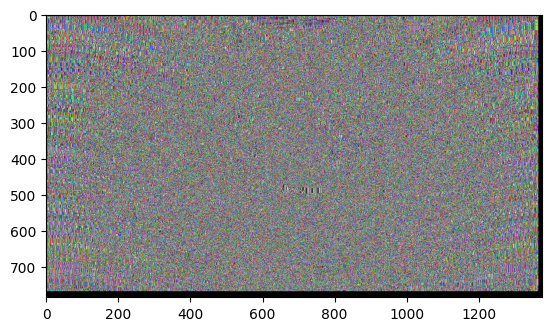

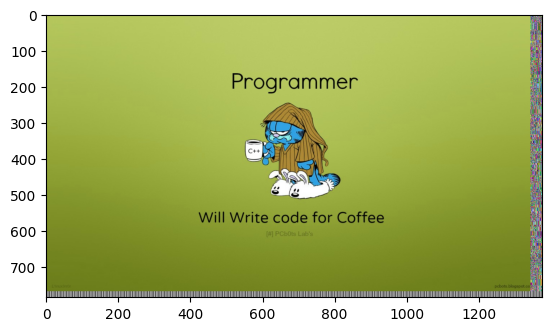

In [20]:

token=''
roundKey=''
filePath=''

def show_save_image_elements():
    # Hide all other elements
    for widget in root.winfo_children():
        if widget not in [image_name_entry, upload_image_btn, save_btn, back_btn]:
            widget.grid_forget()
    # Show elements for saving image
    image_name_label.grid(row=4, column=0, sticky="w", padx=10, pady=5)
    image_name_entry.grid(row=4, column=1, padx=10, pady=5)
    upload_image_btn.grid(row=5, column=0, padx=10, pady=5)
    save_btn.grid(row=5, column=1, padx=10, pady=5)
    back_btn.grid(row=0, column=0, sticky="nw", padx=10, pady=10)

def show_get_image_elements():
    # Hide all other elements
    for widget in root.winfo_children():
        if widget not in [image_name_entry, get_image_btn, back_btn]:
            widget.grid_forget()
    # Show elements for getting image
    image_name_label.grid(row=4, column=0, sticky="w", padx=10, pady=5)
    image_name_entry.grid(row=4, column=1, padx=10, pady=5)
    get_btn.grid(row=5, column=0, columnspan=2, padx=10, pady=5)
    back_btn.grid(row=0, column=0, sticky="nw", padx=10, pady=10)


def upload_image():
    global file_path
    file_path = filedialog.askopenfilename()
    print(file_path)
    # Do something with the file_path

def save_image():
    image_name = image_name_entry.get()
    img=cv2.imread(file_path)
    plt.imshow(img)
    plt.show()
    addImage(token,img,image_name,roundKey)
    # Do something with the image_name

def get_image():
    image_name=image_name_entry.get()
    getImage(token,image_name,roundKey)


def toggle_action():
    action_text.set("Sign Up" if toggle_var.get() else "Login")
    toggle_text.set("Already Registered?" if toggle_var.get() else "Don't have an account?")




def show_buttons():
    # Hide all other elements
    for widget in root.winfo_children():
        if widget not in [get_image_btn, save_image_btn, back_btn]:
            widget.grid_forget()
    # Show the new buttons
    get_image_btn.grid(row=4, column=0, padx=5, pady=5)
    save_image_btn.grid(row=4, column=1, padx=5, pady=5)
    back_btn.grid(row=0, column=0, sticky="nw", padx=10, pady=10)

def reset_window():
    # Show all original elements
    for widget in root.winfo_children():
        widget.grid()
    # Hide the new buttons
    image_name_label.grid_forget()
    image_name_entry.grid_forget()
    upload_image_btn.grid_forget()
    get_image_btn.grid_forget()
    save_btn.grid_forget()
    back_btn.grid_forget()
    get_image_btn.grid_forget()
    save_image_btn.grid_forget()


def signIn():
    username=username_entry.get()
    password=password_entry.get()
    global token,roundKey
    if toggle_var.get():
        print('registering')
        user=register(username,password)
        token=user['token']
        key1=user['user']['key']
        key=makeKey(key1,password)
        roundKey=EntendKey(key)
    else:
        print('logging in')
        
        user=login(username,password)
        token=user['token']
        key1=user['user']['key']
        key=makeKey(key1,password)
        roundKey=EntendKey(key)
    show_buttons()

# Create main window
root = tk.Tk()
root.title("Sign Up / Login")

# Toggle button
toggle_var = tk.BooleanVar()
toggle_var.set(True)  # Set default state to Sign Up
toggle_text=tk.StringVar()
toggle = tk.Checkbutton(root, textvariable=toggle_text, variable=toggle_var, command=toggle_action)
toggle.grid(row=0, column=0, sticky="w")

# Username input
tk.Label(root, text="Username:").grid(row=1, column=0, sticky="w")
username_entry = tk.Entry(root)
username_entry.grid(row=1, column=1)

# Password input
tk.Label(root, text="Password:").grid(row=2, column=0, sticky="w")
password_entry = tk.Entry(root, show="*")
password_entry.grid(row=2, column=1)

# Action button
action_text = tk.StringVar()
action_btn = tk.Button(root, textvariable=action_text,command=signIn)
action_btn.grid(row=3, columnspan=3)

get_image_btn = tk.Button(root, text="Get Image",  command=show_get_image_elements)
save_image_btn = tk.Button(root, text="Save Image",command=show_save_image_elements)

# Hide the image management buttons initially
get_image_btn.grid_forget()
save_image_btn.grid_forget()

image_name_label = tk.Label(root, text="Image Name:")
image_name_entry = tk.Entry(root)
upload_image_btn = tk.Button(root, text="Upload Image", command=upload_image)
save_btn = tk.Button(root, text="Save", command=save_image)
get_btn=tk.Button(root, text="Get", command=get_image)


# Back arrow button
back_btn = tk.Button(root, text="◀", command=reset_window, font=("Arial", 8))

# Hide the back arrow button initially
image_name_label.grid_forget()
image_name_entry.grid_forget()
upload_image_btn.grid_forget()
get_image_btn.grid_forget()
save_btn.grid_forget()
back_btn.grid_forget()
get_btn.grid_forget()
# Set initial state of action button
toggle_action()

# Run the GUI
root.mainloop()
